<a href="https://colab.research.google.com/github/lexiwellen/Data-Science/blob/main/Lexi_Wellen_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://tensorspace.org/

In [ ]:
%%capture
!pip install wandb
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
from flashtorch.utils import apply_transforms
import wandb as wb

In [ ]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()
    
def get_google_slide(url):
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

def get_slides(url):
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

def load(image):

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}

model = alexnet(weights='DEFAULT').to(device)
model.eval();

In [ ]:
url = "https://docs.google.com/presentation/d/1lyE52a0yLCu9iUiKeFmdKayGJhu2Z6fyToXEMKeigoY/edit#slide=id.p"

In [ ]:
#website to get the pictures of the dogs

In [ ]:
url = "https://docs.google.com/presentation/d/1lT0mvrHzBxGp0Uv2sSurxpMu1lrowwStE8WWOx95ZU0/edit#slide=id.p"

In [ ]:
#url for apples and oranges

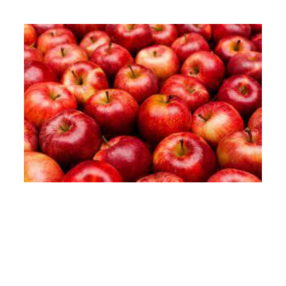

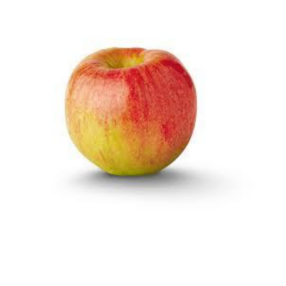

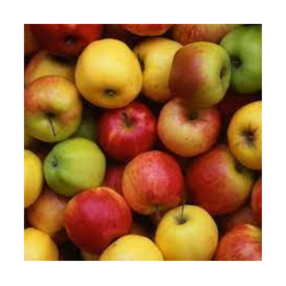

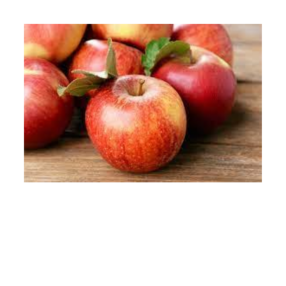

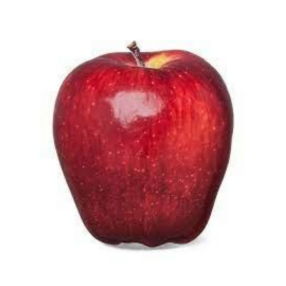

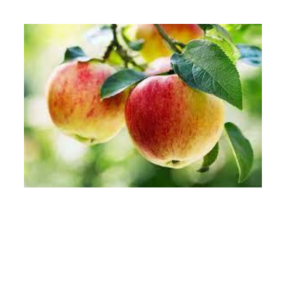

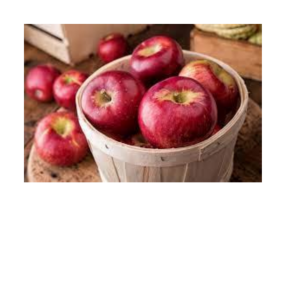

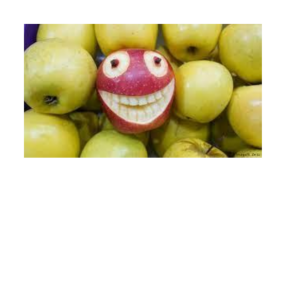

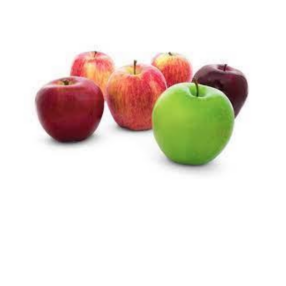

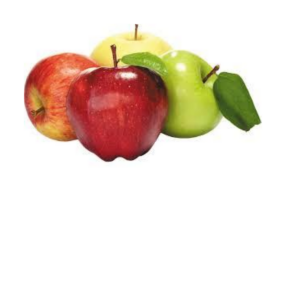

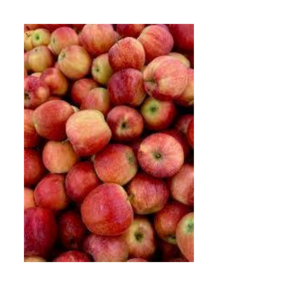

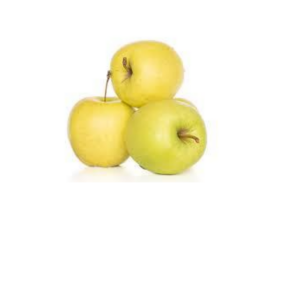

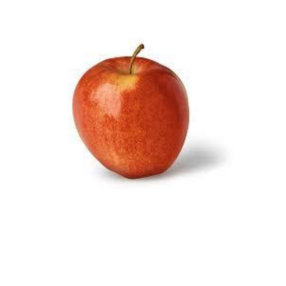

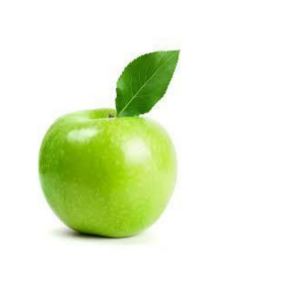

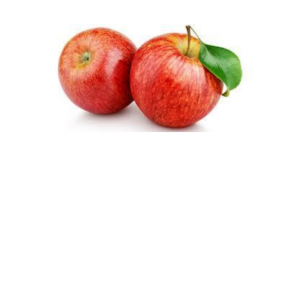

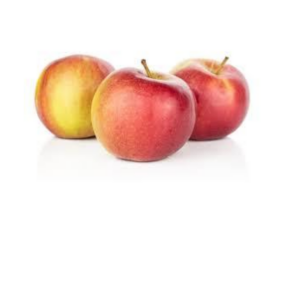

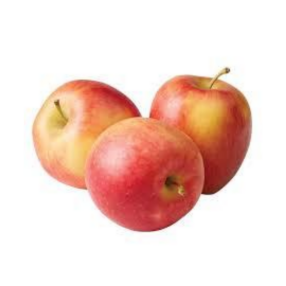

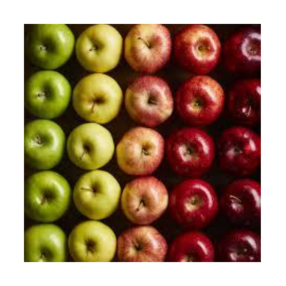

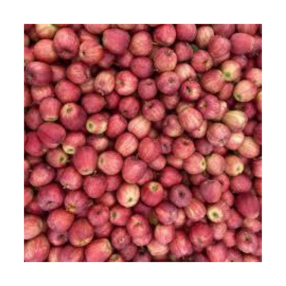

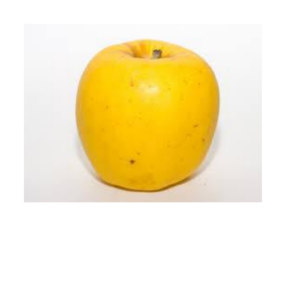

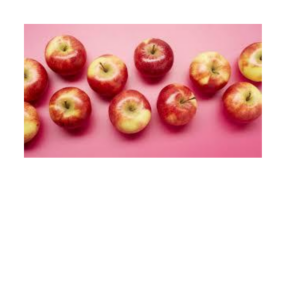

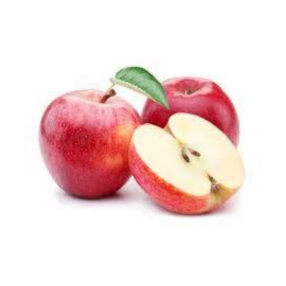

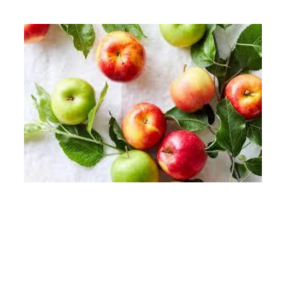

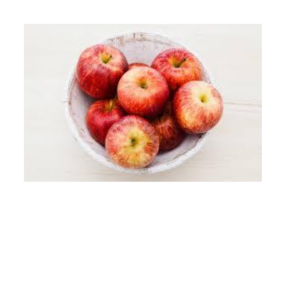

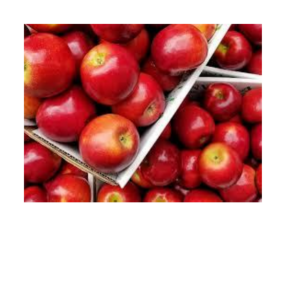

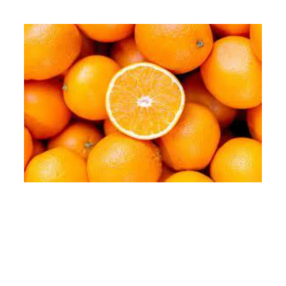

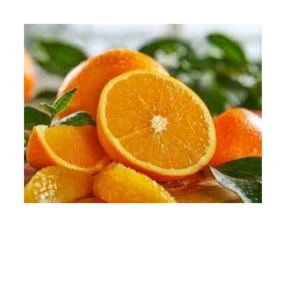

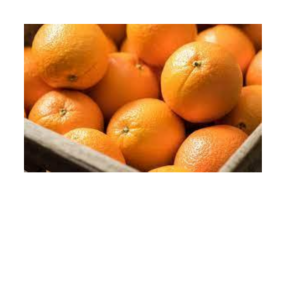

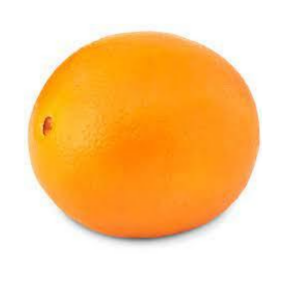

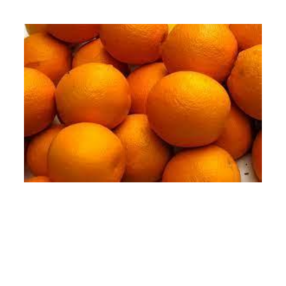

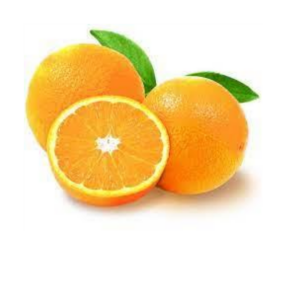

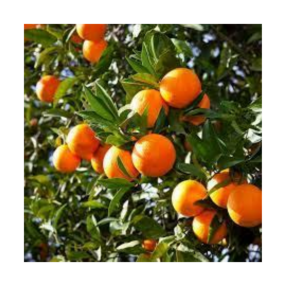

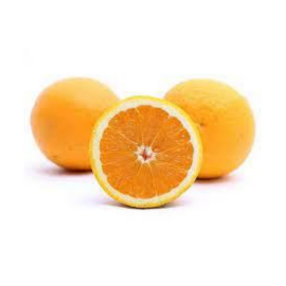

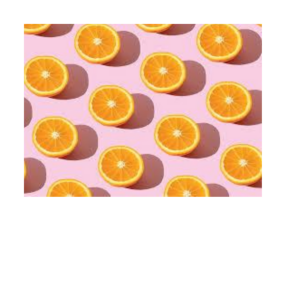

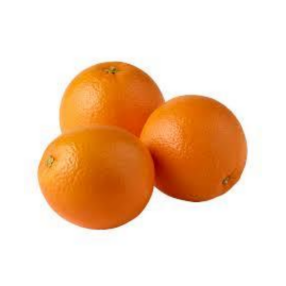

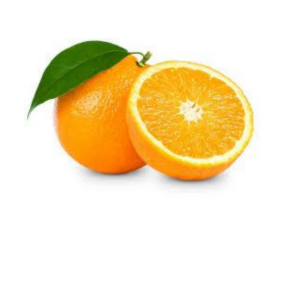

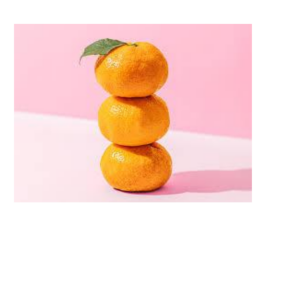

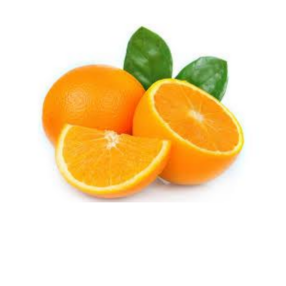

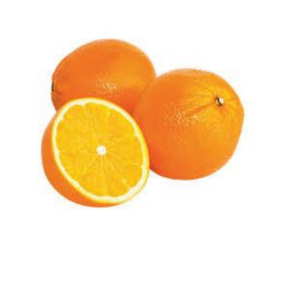

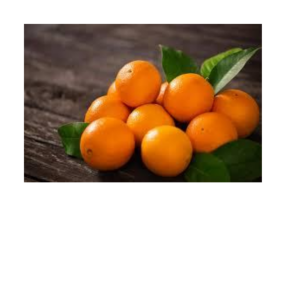

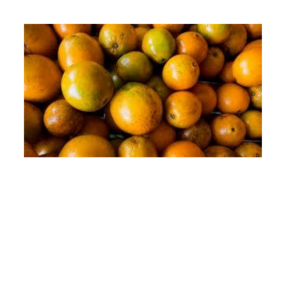

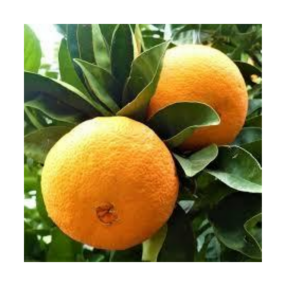

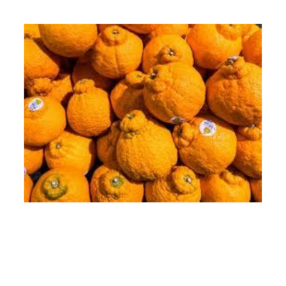

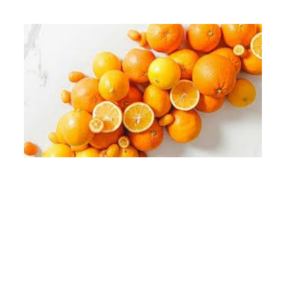

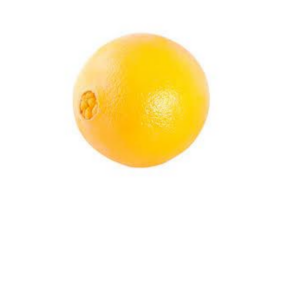

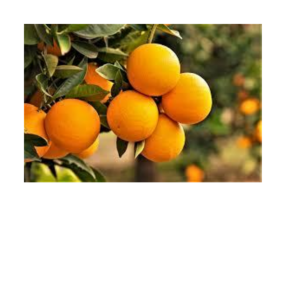

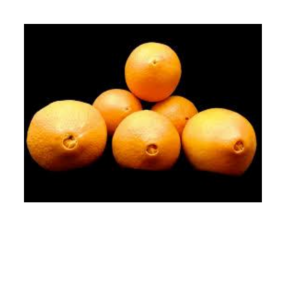

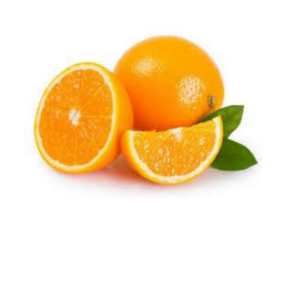

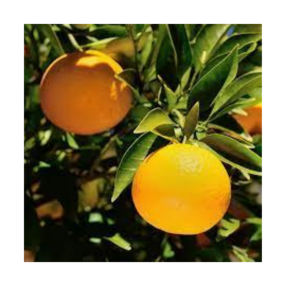

In [ ]:
images = []

for image in get_slides(url): 

    plot(image)

    images.append(load(image))

images = torch.vstack(images)

In [ ]:
#uploaded slides

In [ ]:
images.shape

torch.Size([49, 3, 224, 224])

In [ ]:
model(images)

tensor([[-1.8396, -1.3025, -5.6099,  ...,  0.3354,  6.5165,  3.7906],
        [-0.2797,  1.5978, -3.8797,  ...,  4.3504,  6.5506,  1.0748],
        [-1.4866, -1.6589, -4.5540,  ...,  3.7764,  8.8329,  0.0526],
        ...,
        [-1.3372, -1.0056, -6.3800,  ...,  2.6226, 11.6755, -0.9072],
        [-1.0321,  1.8526, -7.3377,  ...,  1.2471,  8.5607, -1.0043],
        [-4.3355, -0.6842, -4.5100,  ...,  3.4813,  5.8195, -3.2575]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
y = model(images)

In [ ]:
y.shape

torch.Size([49, 1000])

In [ ]:
#choosing size for images to appear

In [ ]:
guesses = torch.argmax(y, 1).cpu().numpy()

In [ ]:
#making guesses for what is in eahc picutre of the slideshow

In [ ]:
for i in list(guesses):
    print(labels[i])

pomegranate
Granny Smith
crate
crate
pomegranate
fig
crate
lemon
Granny Smith
bell pepper
matchstick
lemon
buckeye, horse chestnut, conker
Granny Smith
pomegranate
buckeye, horse chestnut, conker
pomegranate
Granny Smith
dishrag, dishcloth
lemon
rubber eraser, rubber, pencil eraser
Granny Smith
bell pepper
pomegranate
abacus
pill bottle
orange
orange
ping-pong ball
lemon
orange
orange
orange
corn
orange
orange
pill bottle
orange
orange
lemon
corn
orange
butternut squash
corn
lemon
lemon
orange
orange
lemon


In [ ]:
#computer generated labels made for each photo

In [ ]:
Y = np.zeros(50,)
Y[25:] = 1

In [ ]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
#an array of zeros

In [ ]:
X = y.detach().cpu().numpy() 

In [ ]:
X.shape

(49, 1000)

In [ ]:
#choosing layout of graph

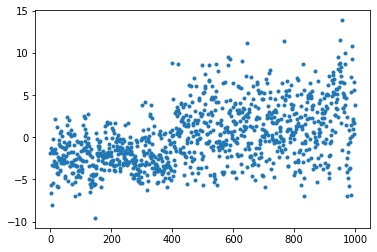

In [ ]:
plt.plot(X[0],'.')

In [ ]:
# . is used to choose how to place data on the graph

In [ ]:
X[0]

array([-1.8396059 , -1.3024539 , -5.609941  , -6.59396   , -3.294225  ,
       -1.6525555 , -8.086491  , -1.8857775 , -0.17536917, -5.4401836 ,
       -1.6547173 , -3.456988  , -1.4854014 , -2.8527672 , -3.1139083 ,
       -1.4015528 ,  2.1191342 , -3.1825013 , -1.8571832 , -2.9921262 ,
       -5.822436  , -4.211434  , -3.5622022 ,  1.2108686 , -5.8691864 ,
       -4.3220387 , -2.3454857 , -0.8209414 , -2.6534116 , -0.2766169 ,
       -3.8302493 , -1.0874265 ,  0.45458812, -4.0135303 , -2.4465218 ,
       -3.101091  ,  0.70053875,  0.15962224, -2.7646234 , -1.1100955 ,
       -2.066755  , -2.9937491 , -2.7157025 , -3.059641  , -2.5471106 ,
       -0.53565264, -1.3034445 , -1.435033  , -4.79593   , -4.5625496 ,
       -2.8818586 , -2.2243338 , -1.1143193 , -0.81325924,  1.4823949 ,
       -2.9167974 ,  2.3739767 , -1.8362455 , -5.2199807 ,  0.4965615 ,
        2.0507324 , -0.6134313 , -0.9305945 ,  0.34487876, -3.354337  ,
       -3.4057055 ,  0.89842904, -1.7660148 ,  0.11423356, -2.89

(array([  2.,  47., 222., 268., 200., 131.,  90.,  30.,   9.,   1.]),
 array([-9.559547  , -7.214799  , -4.87005   , -2.5253015 , -0.18055268,
         2.164196  ,  4.5089445 ,  6.8536935 ,  9.198442  , 11.543191  ,
        13.887939  ], dtype=float32),
 <a list of 10 Patch objects>)

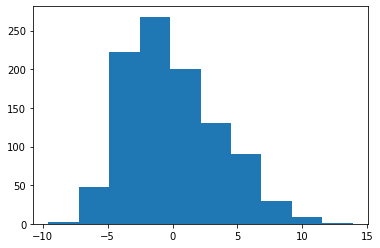

In [ ]:
plt.hist(X[0])

In [ ]:
# used to plot of histogram

In [ ]:
labels

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

In [ ]:
# a list of all the categories and labels for pictures that the system contains

In [ ]:
np.argmax(X[0])

957

In [ ]:
#system chooses a number ans the number correlates woth a word which is what is the putput when you label a photo

In [ ]:
top_ten = np.argsort(X[0])[::-1][0:10]

In [ ]:
[print(labels[i]) for i in top_ten];

pomegranate
strawberry
rubber eraser, rubber, pencil eraser
matchstick
buckeye, horse chestnut, conker
red wine
hair slide
bell pepper
hip, rose hip, rosehip
hamper


In [ ]:
# these are the top ten labels for the pictures

In [ ]:
X = GPU_data(X)
Y = GPU_data(Y)

<ipython-input-66-4608b466ff03>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))


In [ ]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [ ]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [ ]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [ ]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [ ]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [ ]:
X.shape

torch.Size([49, 1000])

In [ ]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
def model(x,w):

    return x@w[0]

In [ ]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

In [ ]:
wb.init(project="Linear_Model_Photo_1");
c = wb.config

c.h = 0.001
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')
    
    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()


<ipython-input-66-4608b466ff03>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))
